# python数据可视化: matplotlib绘图
实用python编程
2018-05-10

首先加载numpy和matplotlib。并调用 `%matplotlib inline` 命令使图片能在notebook中显示。

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 从简单的例子开始
画一条直线 $y=x$.

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
[(0.0, 0.0), (0.5, 0.5), (1.0, 1.0), (1.5, 1.5), (2.0, 2.0), (2.5, 2.5), (3.0, 3.0), (3.5, 3.5), (4.0, 4.0), (4.5, 4.5), (5.0, 5.0), (5.5, 5.5), (6.0, 6.0), (6.5, 6.5), (7.0, 7.0), (7.5, 7.5), (8.0, 8.0), (8.5, 8.5), (9.0, 9.0), (9.5, 9.5), (10.0, 10.0)]


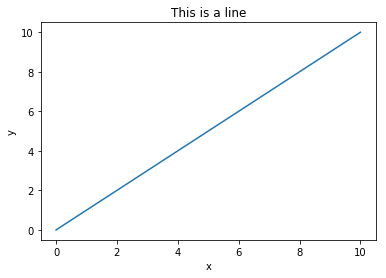

In [49]:
fig = plt.figure()
axes = plt.axes()

x = np.linspace(0, 10, 21)
print x
y = [v for v in x]
print zip(x,y)

axes.plot(x, y)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('This is a line')

# 显示格子线
#plt.grid()

# 把字体调大一点
#axes.set_xlabel('x', fontsize=28)
#axes.set_ylabel('y', fontsize=28)
#axes.set_title('This is a line', fontsize=28)
#plt.xticks(fontsize=28, rotation=0)
#plt.yticks(fontsize=28, rotation=0)

#### 课堂练习180510-1
画一条抛物线 $y=x^2$ 及其他函数曲线如指数 $e^x$, 对数 $\log_b(x)$

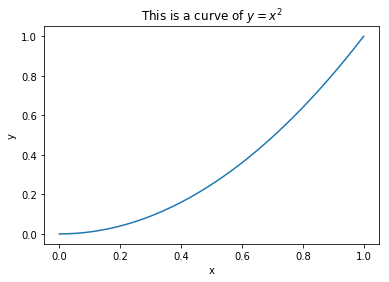

In [51]:
fig = plt.figure()
axes = plt.axes()

x = np.linspace(1e-6, 1, 100) # Return evenly spaced numbers over a specified interval
y = map(lambda v:v**2, x)
#y = map(np.log, x)
axes.plot(x,y)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('This is a curve of $y=x^2$')

## 调整线条的属性
* 线型
* 颜色
* 宽度

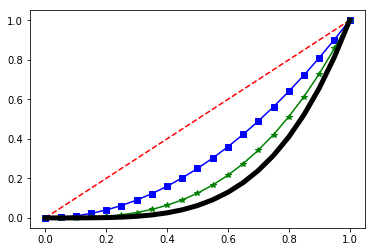

In [69]:
axes = plt.axes()
t = np.linspace(0, 1, 21)
# red dashes, blue line, and green triangles
(line1, ) = axes.plot(t, t, 'r--') # 将plot函数返回的列表的第1个元素存放到line1中
(line2, ) = axes.plot(t, t**2, 'b-s')
(line3, ) = axes.plot(t, t**3, 'g-*')
(line4, ) = axes.plot(t, t**4, 'k-', linewidth=5)

In [78]:
one_element_list = [1]
(a, ) = one_element_list
print a

1


我们也可以只用一个 `plot` 同时画出多个线条

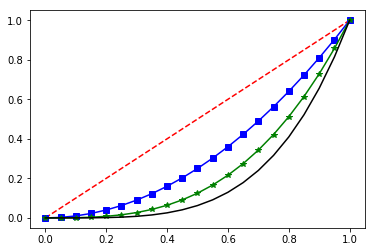

In [73]:
axes = plt.axes()
lines = axes.plot(t, t, 'r--', t, t**2, 'b-s', t, t**3, 'g-*', t, t**4, 'k-')

注意到`plot`函数返回一个`list`, `list`中的每个元素是一个 `Line2D` 类型的变量，对应每条线。

可通过调用 [Line2D的各种方法](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)定制每条线的风格。

下面的例子展示了如何利用这些方法将最下方的线型改为dash-dotted风格，并增加线条宽度。

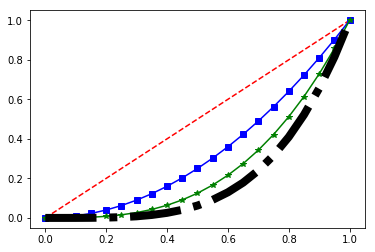

In [77]:
axes = plt.axes()
lines = axes.plot(t, t, 'r--', t, t**2, 'b-s', t, t**3, 'g-*', t, t**4, 'k-')
lines[-1].set_linestyle('-.')
lines[-1].set_linewidth(8)

## 子图
用plot.subplots方法可以在一张图上画出多个子图。

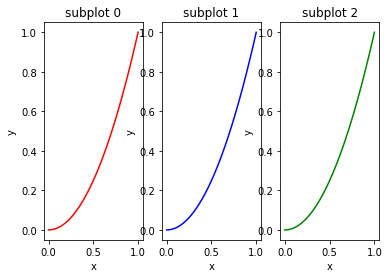

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=3)
colors = 'r b g k y'.split()
for i,ax in enumerate(axes):
    ax.plot(x, y, colors[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('subplot %d' % i)

注意到右图的y标签落到了左图上。`fig.tight_layout`方法可以自动调整两图的位置使二者不重叠。

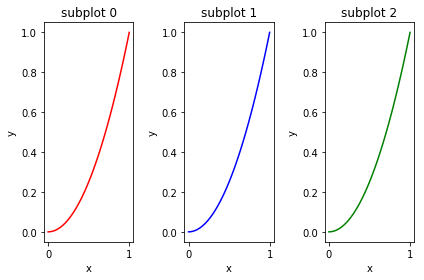

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3)
colors = 'r b g k y'.split()
for i,ax in enumerate(axes):
    ax.plot(x, y, colors[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('subplot %d' % i)
fig.tight_layout()

2 3


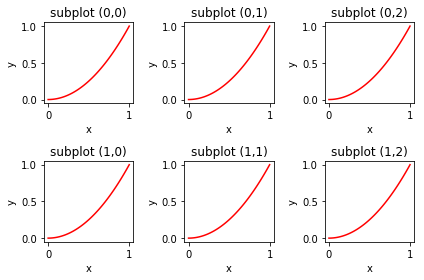

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=3)
max_row, max_col = axes.shape
print max_row, max_col

for i in range(max_row):
    for j in range(max_col):
        ax = axes[i][j]
        ax.plot(x, y, 'r')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('subplot (%d,%d)' %(i,j))
    
fig.tight_layout()

## 特定方向的直线

* 水平方向  $x=0.5$
* 竖直方向  $y=0.5$

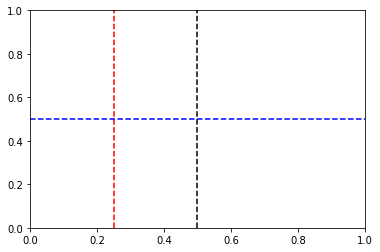

In [58]:
plt.axvline(x=0.5, color='k', linestyle='--')
plt.axvline(x=0.25, color='r', linestyle='--')
plt.axhline(y=0.5, color='b', linestyle='--')

## 图例 legend
为了让读者更好地理解上图中每条直线/曲线的含义，可通过legend（图例）给每条曲线加说明。

指定图例的方法 1

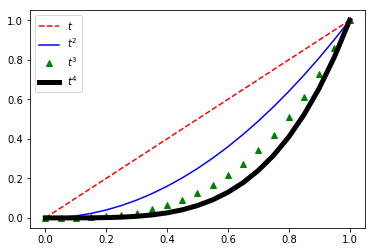

In [60]:
fig, axes = plt.subplots()
t = np.linspace(0, 1, 21)
# red dashes, blue line, and green triangles
(line1, ) = axes.plot(t, t, 'r--', label='$t$')
(line2, ) = axes.plot(t, t**2, 'b-', label='$t^2$')
(line3, ) = axes.plot(t, t**3, 'g^', label='$t^3$')
(line4, ) = axes.plot(t, t**4, 'k-', linewidth=5, label='$t^4$')
axes.legend()

指定图例的方法 2

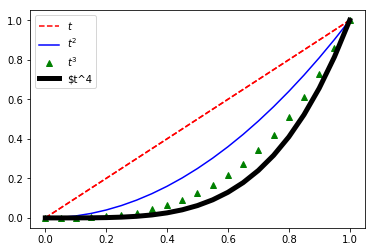

In [65]:
fig, axes = plt.subplots()
t = np.linspace(0, 1, 21)
res = axes.plot(t, t, 'r--')
(line1, ) = axes.plot(t, t, 'r--')
(line2, ) = axes.plot(t, t**2, 'b-')
(line3, ) = axes.plot(t, t**3, 'g^')
(line4, ) = axes.plot(t, t**4, 'k-', linewidth=5)
axes.legend([line1, line2, line3, line4], ['$t$', '$t^2$', '$t^3$', '$t^4'])

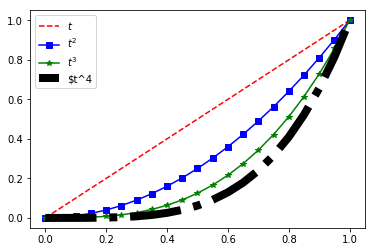

In [81]:
axes = plt.axes()

t = np.linspace(0, 1, 21)
lines = axes.plot(t, t, 'r--', t, t**2, 'b-s', t, t**3, 'g-*', t, t**4, 'k-')
lines[-1].set_linestyle('-.')
lines[-1].set_linewidth(8)
line_names = ['$t$', '$t^2$', '$t^3$', '$t^4']
axes.legend(lines, line_names)

### legend的各种属性

* 位置 location
* 字体大小 font
* ...

参考资料: https://matplotlib.org/users/legend_guide.html

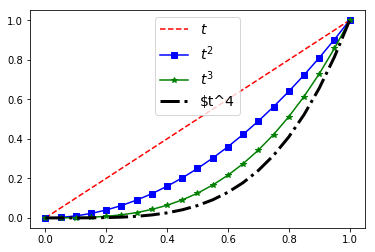

In [96]:
axes = plt.axes()

t = np.linspace(0, 1, 21)
lines = axes.plot(t, t, 'r--', t, t**2, 'b-s', t, t**3, 'g-*', t, t**4, 'k-')
lines[-1].set_linestyle('-.')
lines[-1].set_linewidth(3)
line_names = ['$t$', '$t^2$', '$t^3$', '$t^4']
axes.legend(lines, line_names, loc=9, prop={'size': 14})

## 散点图 Scatter plot

-1.74928 1.56493 -2.8015 2.20744


[-3, 3, -3, 3]

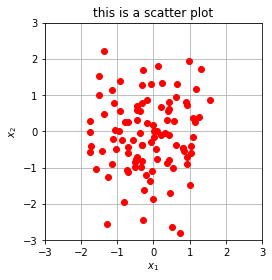

In [99]:
from openpyxl import load_workbook
wb = load_workbook('data/data20171023.xlsx')
ws = wb.active
x1 = [x.value for x in ws['B'][1:]]
x2 = [x.value for x in ws['C'][1:]]
print min(x1), max(x1), min(x2), max(x2)

fig, axes = plt.subplots()
axes.plot(x1, x2, 'ro')
#axes.plot(x1, x2, 'ro', markerfacecolor="None")
axes.set_xlabel('$x_1$')
axes.set_ylabel('$x_2$')
axes.set_title('this is a scatter plot')
axes.set_aspect('equal')
plt.grid(True)
plt.axis([-3, 3, -3, 3])

## 定制坐标

### 以原点作为图的中心点

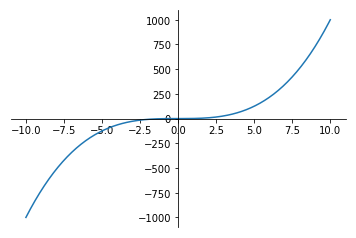

In [100]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

t = np.linspace(-10, 10., 200)
#y = map(lambda x:1/(1+np.exp(-x)), t)
y = map(lambda x:x**3, t)
ax.plot(t, y);

### 双坐标

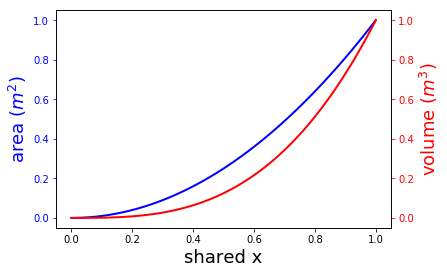

In [107]:
fig, ax_left = plt.subplots()
x = np.linspace(0, 1, 101)
ax_left.plot(x, x**2, lw=2, color="blue")
ax_left.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")

ax_left.tick_params(axis='y', colors='blue')

#for label in ax_left.get_yticklabels():
#    label.set_color("blue")
    

ax_right = ax_left.twinx()
ax_right.plot(x, x**3, lw=2, color="red")
ax_right.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")

ax_right.tick_params(axis='y', colors='red')

#for label in ax_right.get_yticklabels():
#    label.set_color("red")
    
ax_left.set_xlabel('shared x', fontsize=18)

## 显示中文

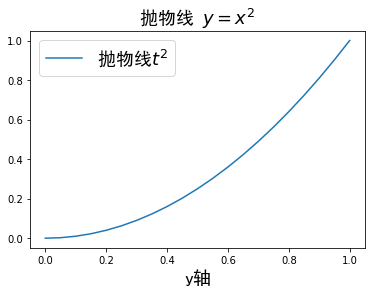

In [111]:
from matplotlib.font_manager import FontProperties

fontsize=18
chf = FontProperties(fname='/Users/xirong/workspace/python-course/simhei.ttf', size=fontsize)
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

fig, axes = plt.subplots()
x = np.linspace(0, 1, 21)
y = x**2
(line, ) = axes.plot(x,y)
axes.set_xlabel(u'x轴', fontproperties=chf)
axes.set_xlabel(u'y轴', fontproperties=chf)
axes.set_title(u'抛物线 $y=x^2$', fontproperties=chf)
axes.legend([line], [u'抛物线$t^2$'], prop=chf)

## 数据可视化

读取人口数据

In [124]:
from openpyxl import load_workbook

wb = load_workbook('data/world_bank_population.xlsx')
ws = wb.active
target = 'Russian Federation'
years = [ws.cell(row=5, column=i).value for i in range(5, ws.max_column+1)]
for row in range(6, ws.max_row+1):
    c = ws.cell(row=row, column=1)
    if c.value == target:
        numbers = [ws.cell(row=row, column=i).value for i in range(5, ws.max_column+1)]
        break
print ('number of records: %d' % len(numbers))
print zip(years, numbers)

number of records: 57
[(1960L, 119897000L), (1961L, 121236000L), (1962L, 122591000L), (1963L, 123960000L), (1964L, 125345000L), (1965L, 126745000L), (1966L, 127468000L), (1967L, 128196000L), (1968L, 128928000L), (1969L, 129664000L), (1970L, 130404000L), (1971L, 131155000L), (1972L, 131909000L), (1973L, 132669000L), (1974L, 133432000L), (1975L, 134200000L), (1976L, 135147000L), (1977L, 136100000L), (1978L, 137060000L), (1979L, 138027000L), (1980L, 139010000L), (1981L, 139941000L), (1982L, 140823000L), (1983L, 141668000L), (1984L, 142745000L), (1985L, 143858000L), (1986L, 144894000L), (1987L, 145908000L), (1988L, 146857000L), (1989L, 147721000L), (1990L, 148292000L), (1991L, 148624000L), (1992L, 148689000L), (1993L, 148520000L), (1994L, 148336000L), (1995L, 148375726L), (1996L, 148160042L), (1997L, 147915307L), (1998L, 147670692L), (1999L, 147214392L), (2000L, 146596557L), (2001L, 145976083L), (2002L, 145306046L), (2003L, 144648257L), (2004L, 144067054L), (2005L, 143518523L), (2006L, 143

接下来，绘制人口曲线

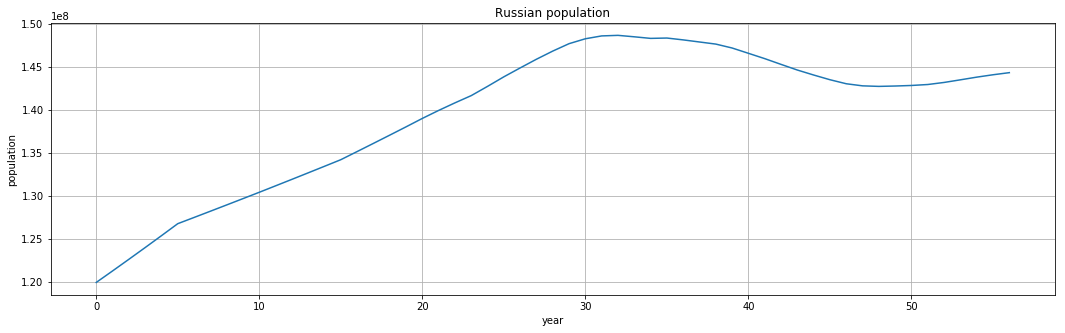

In [131]:
fig = plt.figure(figsize=(18,5))
axes = plt.axes()
axes.plot(np.arange(len(years)), numbers)

axes.set_xlabel('year')
axes.set_ylabel('population')
axes.set_title('Russian population')

#axes.set_xticks(np.arange(len(years)))
#axes.set_xticklabels(years) 

plt.grid()

对上图进行优化

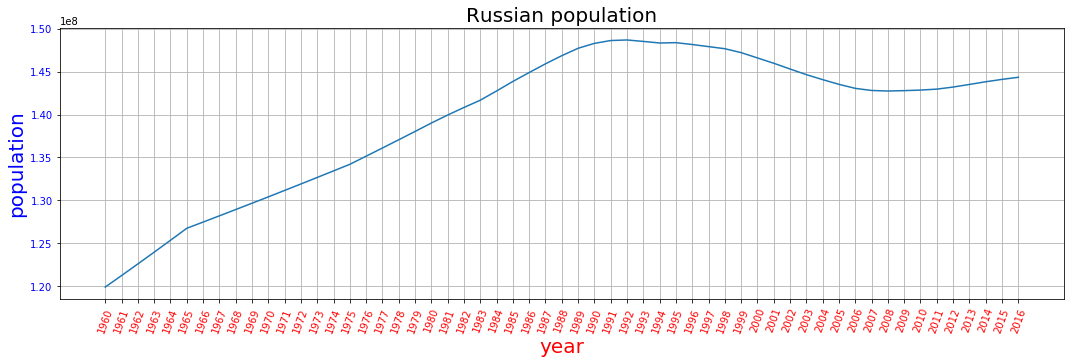

In [123]:
fig = plt.figure(figsize=(18,5))
axes = plt.axes()
fontsize= 20

line, = axes.plot(np.arange(len(years)), numbers)
axes.set_xlabel('year', fontsize=fontsize, color='red')
axes.set_ylabel('population', fontsize=fontsize, color='blue')
axes.set_title('Russian population', fontsize=fontsize)

axes.set_xticks(np.arange(len(years)))
axes.set_xticklabels(years) 

#plt.xticks(rotation=90)
plt.setp(axes.xaxis.get_majorticklabels(), rotation=70, color='red')

#plt.yticks(fontsize=16)
plt.setp(axes.yaxis.get_majorticklabels(), rotation=0, color='blue')

plt.grid()